# 利用lstm进行生成莫言小说

## 1. 项目背景
这个项目是建立一个能够自动生成一片文章的深度学习模型，我们可以通过给出钱几个字就自动生成一篇文章的模型。

## 2. 项目数据
项目数据使用了莫言小说《生死疲劳》，内容如下：

In [1]:
# ========读取原始数据========
with open('data.txt', 'r', encoding='utf-8') as f:
    data = f.readlines()
print(data[0])

　　我的故事，从1950年1月1日讲起。在此之前两年多的时间里，我在阴曹地府里受尽了人间难以想象的 酷刑。每次提审，我都会鸣冤叫屈。我的声音悲壮凄凉，传播到阎罗大殿的每个角落，激发出重重叠叠的 回声。我身受酷刑而绝不改悔，挣得了一个硬汉子的名声。我知道许多鬼卒对我暗中钦佩，我也知道阎王 老子对我不胜厌烦。为了让我认罪服输，他们使出了地狱酷刑中最歹毒的一招，将我扔到沸腾的油锅里， 翻来覆去，像炸(又鸟)一样炸了半个时辰，痛苦之状，难以言表。鬼卒还用叉子把我叉起来，高高举着， 一步步走上通往大殿的台阶。两边的鬼卒嘬口吹哨，如同成群的吸血蝙蝠鸣叫。我的身体滴油淅沥，落在 台阶上，冒出一簇簇黄烟……鬼卒小心翼翼地将我安放在阎罗殿前的青石板上，跪下向阎王报告：“大王 ，炸好了。”



## 3. 数据处理
### 3.1数据清洗
**首先需要将括号里的内容删除掉。**

In [2]:
import re
# 生成一个正则，负责找'()'包含的内容
pattern = re.compile(r'\(.*\)')
# 将其替换为空
data = [pattern.sub('', lines) for lines in data]
print(data[0])

　　我的故事，从1950年1月1日讲起。在此之前两年多的时间里，我在阴曹地府里受尽了人间难以想象的 酷刑。每次提审，我都会鸣冤叫屈。我的声音悲壮凄凉，传播到阎罗大殿的每个角落，激发出重重叠叠的 回声。我身受酷刑而绝不改悔，挣得了一个硬汉子的名声。我知道许多鬼卒对我暗中钦佩，我也知道阎王 老子对我不胜厌烦。为了让我认罪服输，他们使出了地狱酷刑中最歹毒的一招，将我扔到沸腾的油锅里， 翻来覆去，像炸一样炸了半个时辰，痛苦之状，难以言表。鬼卒还用叉子把我叉起来，高高举着， 一步步走上通往大殿的台阶。两边的鬼卒嘬口吹哨，如同成群的吸血蝙蝠鸣叫。我的身体滴油淅沥，落在 台阶上，冒出一簇簇黄烟……鬼卒小心翼翼地将我安放在阎罗殿前的青石板上，跪下向阎王报告：“大王 ，炸好了。”



**然后我们将省略号'......'替换为句号'。'**

In [3]:
# 将.....替换为句号
data = [line.replace('……', '。') for line in data if len(line) > 1]
print(data[0])

　　我的故事，从1950年1月1日讲起。在此之前两年多的时间里，我在阴曹地府里受尽了人间难以想象的 酷刑。每次提审，我都会鸣冤叫屈。我的声音悲壮凄凉，传播到阎罗大殿的每个角落，激发出重重叠叠的 回声。我身受酷刑而绝不改悔，挣得了一个硬汉子的名声。我知道许多鬼卒对我暗中钦佩，我也知道阎王 老子对我不胜厌烦。为了让我认罪服输，他们使出了地狱酷刑中最歹毒的一招，将我扔到沸腾的油锅里， 翻来覆去，像炸一样炸了半个时辰，痛苦之状，难以言表。鬼卒还用叉子把我叉起来，高高举着， 一步步走上通往大殿的台阶。两边的鬼卒嘬口吹哨，如同成群的吸血蝙蝠鸣叫。我的身体滴油淅沥，落在 台阶上，冒出一簇簇黄烟。鬼卒小心翼翼地将我安放在阎罗殿前的青石板上，跪下向阎王报告：“大王 ，炸好了。”



**只保留有效的数据，包括汉字、字母、数字、中文符号等信息，其他乱码进行清除**

In [4]:
# ==============判断char是否是乱码===================
def is_uchar(uchar):
    """判断一个unicode是否是汉字"""
    if uchar >= u'\u4e00' and uchar<=u'\u9fa5':
            return True
    """判断一个unicode是否是数字"""
    if uchar >= u'\u0030' and uchar<=u'\u0039':
            return True       
    """判断一个unicode是否是英文字母"""
    if (uchar >= u'\u0041' and uchar<=u'\u005a') or (uchar >= u'\u0061' and uchar<=u'\u007a'):
            return True
    if uchar in ('，','。','：','？','“','”','！','；','、','《','》','——'):
            return True
    return False

# 将每行的list合成一个长字符串
data = ''.join(data)
data = [char for char in data if is_uchar(char)]
data = ''.join(data)
print(data[:100])

我的故事，从1950年1月1日讲起。在此之前两年多的时间里，我在阴曹地府里受尽了人间难以想象的酷刑。每次提审，我都会鸣冤叫屈。我的声音悲壮凄凉，传播到阎罗大殿的每个角落，激发出重重叠叠的回声。我身受酷


### 3.2 生成字典
我们需要将汉字映射为能够输入到模型中的数字信息，就需要建立一个映射关系，需要生成汉字和数字互相映射的字典。

In [5]:
# =====生成字典=====
vocab = set(data)
id2char = list(vocab)
char2id = {c:i for i,c in enumerate(vocab)}

print('字典长度:', len(vocab))

字典长度: 3892


### 3.3 转换输入数据格式
建立字典后，将文本数据映射为数字数据形式，并整理为矩阵格式。

In [6]:
import numpy as np
# =====转换数据为数字格式======
numdata = [char2id[char] for char in data]
numdata = np.array(numdata)

print('数字数据信息：\n', numdata[:100])
print('\n文本数据信息：\n', ''.join([id2char[i] for i in numdata[:100]]))

数字数据信息：
 [ 841  146 1063 1305 2317 3333 3011 3032 1932 3675 2677 3011 3118 3011
 3010 2883 2348 2104 3307 3060 3122 3198  556 2677 3375  146 1345 3585
 2640 2317  841 3307  409   36 3531 3830 2640  290  308 3201 3882 3585
 3117 3249 2012 1901  146  141 1547 2104 2122  835 1983 2146 2317  841
 1940 1304 3518 1968 1447 2137 2104  841  146 2986 3886 3829 3267 1043
 2110 2317 3800 2903 3141   64 2333 3432 3430  146 2122 2032   98  325
 2317 2988  875 1664  738  738  924  924  146 3764 2986 2104  841 1540
  290  141]

文本数据信息：
 我的故事，从1950年1月1日讲起。在此之前两年多的时间里，我在阴曹地府里受尽了人间难以想象的酷刑。每次提审，我都会鸣冤叫屈。我的声音悲壮凄凉，传播到阎罗大殿的每个角落，激发出重重叠叠的回声。我身受酷


### 3.4 设计数据生成器
这篇文章有几十万个字：

In [7]:
print(len(data))

377480


我们通常不会将数据一股脑扔到网络中进行训练，而是将数据分为一个batch一个batch的进行训练。
下面的函数实现了将数据切分为一个个的[batch_size, time_steps]形式，这种数据也是循环神经网络训练中使用的格式。
通过观察输入数据和输出数据我们发现，输入数据总是比输出数据提前一个time_step。如下图所示：
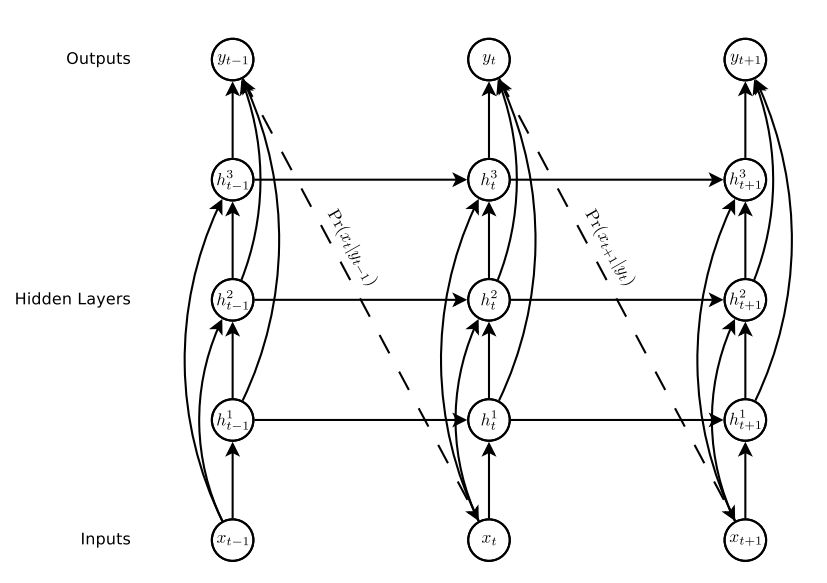
这是因为我们要建立的模型实现的功能是希望通过输入：3001 3472 3811 1021  271 能够成功的预测下一个单词：1644

In [8]:
# =======设计数据生成器=========
def data_generator(data, batch_size, time_stpes):
	samples_per_batch = batch_size * time_stpes
	batch_nums = len(data) // samples_per_batch
	data = data[:batch_nums*samples_per_batch]
	data = data.reshape((batch_size, batch_nums, time_stpes))
	for i in range(batch_nums):
		x = data[:, i, :]
		y = np.zeros_like(x)
		y[:, :-1] = x[:, 1:]
		try:
			y[:, -1] = data[:, i+1, 0]
		except:
			y[:, -1] = data[:, 0, 0]
		yield x, y

# 打印输出数据
data_batch = data_generator(numdata, 2, 5)
x, y = next(data_batch)
print('input data:', x[0], '\noutput data:', y[0])

input data: [ 841  146 1063 1305 2317] 
output data: [ 146 1063 1305 2317 3333]


## 4. 模型选择与建模
我们选择rnn来作为文本生成模型结构如下：
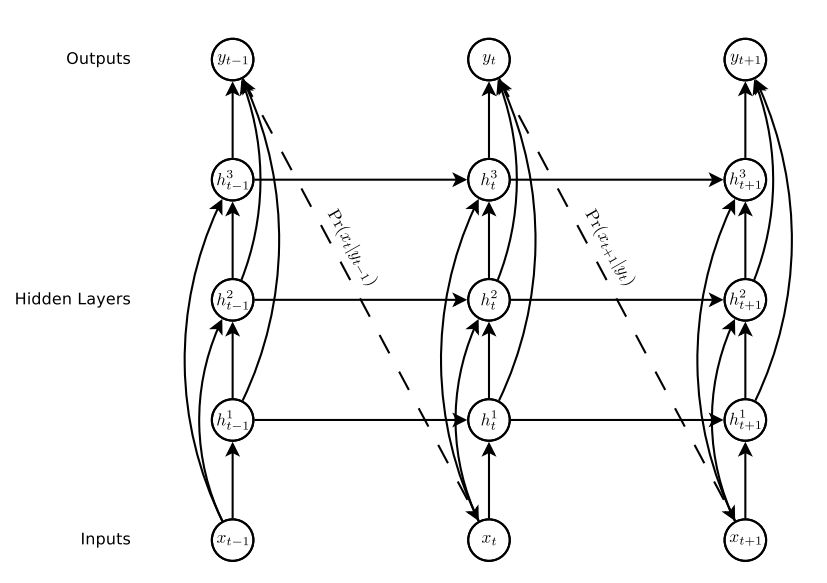
我们选择lstm来做为其中的隐藏层：
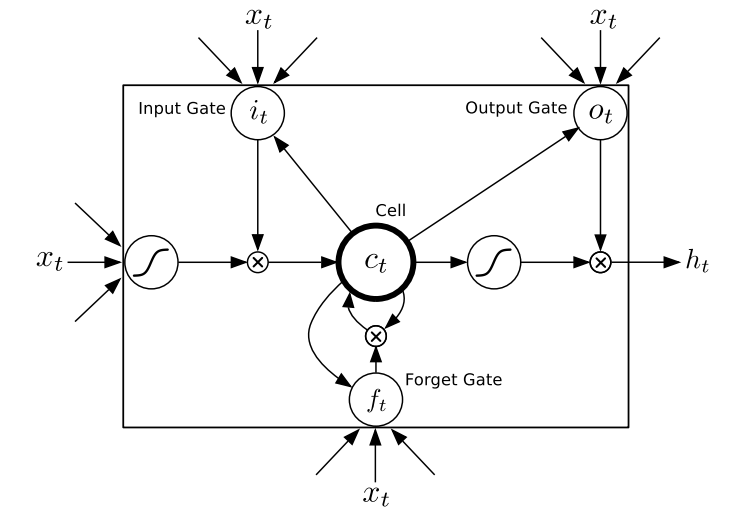
### 4.1 使用tensorflow进行建模：

In [9]:
import tensorflow as tf
# ====================================搭建模型===================================
class RNNModel():
	"""docstring for RNNModel"""
	def __init__(self, BATCH_SIZE, HIDDEN_SIZE, HIDDEN_LAYERS, VOCAB_SIZE, learning_rate):
		super(RNNModel, self).__init__()
		self.BATCH_SIZE = BATCH_SIZE
		self.HIDDEN_SIZE = HIDDEN_SIZE
		self.HIDDEN_LAYERS = HIDDEN_LAYERS
		self.VOCAB_SIZE = VOCAB_SIZE
		
		# ======定义占位符======
		with tf.name_scope('input'):
			self.inputs = tf.placeholder(tf.int32, [BATCH_SIZE, None])
			self.targets = tf.placeholder(tf.int32, [BATCH_SIZE, None])
			self.keepprb = tf.placeholder(tf.float32)

		# ======定义词嵌入层======
		with tf.name_scope('embedding'):
			embedding = tf.get_variable('embedding', [VOCAB_SIZE, HIDDEN_SIZE])
			emb_input = tf.nn.embedding_lookup(embedding, self.inputs)
			emb_input = tf.nn.dropout(emb_input, self.keepprb)

		# ======搭建lstm结构=====
		with tf.name_scope('rnn'):
			lstm = tf.contrib.rnn.LSTMCell(HIDDEN_SIZE, state_is_tuple=True)
			lstm = tf.contrib.rnn.DropoutWrapper(lstm, output_keep_prob=self.keepprb)
			cell = tf.contrib.rnn.MultiRNNCell([lstm] * HIDDEN_LAYERS)
			self.initial_state = cell.zero_state(BATCH_SIZE, tf.float32)
			outputs, self.final_state = tf.nn.dynamic_rnn(cell, emb_input, initial_state=self.initial_state)
            
		# =====重新reshape输出=====
		with tf.name_scope('output_layer'):
			outputs = tf.reshape(tf.concat(outputs, 1), [-1, HIDDEN_SIZE])
			w = tf.get_variable('outputs_weight', [HIDDEN_SIZE, VOCAB_SIZE])
			b = tf.get_variable('outputs_bias', [VOCAB_SIZE])
			logits = tf.matmul(outputs, w) + b

		# ======计算损失=======
		with tf.name_scope('loss'):
			self.loss = tf.contrib.legacy_seq2seq.sequence_loss_by_example([logits], [tf.reshape(self.targets, [-1])], 
															[tf.ones([BATCH_SIZE * TIME_STEPS], dtype=tf.float32)])
			self.cost = tf.reduce_sum(self.loss) / BATCH_SIZE

		# =============优化算法==============
		with tf.name_scope('opt'):
            # =============学习率衰减==============
			global_step = tf.Variable(0)
			learning_rate = tf.train.exponential_decay(learning_rate, global_step, BATCH_NUMS, 0.99, staircase=True)

			# =======通过clip_by_global_norm()控制梯度大小======
			trainable_variables = tf.trainable_variables()
			grads, _ = tf.clip_by_global_norm(tf.gradients(self.cost, trainable_variables), MAX_GRAD_NORM)
			self.opt = tf.train.AdamOptimizer(learning_rate).apply_gradients(zip(grads, trainable_variables))

		# ==============预测输出=============
		with tf.name_scope('predict'):
			self.predict = tf.argmax(logits, 1)

### 4.2 定义训练参数及模型参数：

In [10]:
# =======预定义模型参数========
VOCAB_SIZE = len(vocab)
EPOCHS = 1
BATCH_SIZE = 8
TIME_STEPS = 100
BATCH_NUMS = len(numdata) // (BATCH_SIZE * TIME_STEPS)
HIDDEN_SIZE = 128
HIDDEN_LAYERS = 2
MAX_GRAD_NORM = 1
learning_rate = 0.003

### 4.3 模型训练和保存

In [11]:
# ===========模型训练===========
model = RNNModel(BATCH_SIZE, HIDDEN_SIZE, HIDDEN_LAYERS, VOCAB_SIZE, learning_rate)

# 保存模型
saver = tf.train.Saver()
with tf.Session() as sess:
	writer = tf.summary.FileWriter('logs/tensorboard', tf.get_default_graph())

	sess.run(tf.global_variables_initializer())
	for k in range(EPOCHS):
		state = sess.run(model.initial_state)
		train_data = data_generator(numdata, BATCH_SIZE, TIME_STEPS)
		total_loss = 0.
		for i in range(BATCH_NUMS):
			xs, ys = next(train_data)
			feed = {model.inputs: xs, model.targets: ys, model.keepprb: 0.8, model.initial_state: state}
			costs, state, _ = sess.run([model.cost, model.final_state, model.opt], feed_dict=feed)
			total_loss += costs
			if (i+1) % 50 == 0:
				print('epochs:', k + 1, 'iter:', i + 1, 'cost:', total_loss / i + 1)

	saver.save(sess, './checkpoints/lstm.ckpt')

writer.close()

epochs: 1 iter: 50 cost: 690.2989925462373
epochs: 1 iter: 100 cost: 669.3652756816209
epochs: 1 iter: 150 cost: 661.2328949998689
epochs: 1 iter: 200 cost: 655.4240072432475
epochs: 1 iter: 250 cost: 651.5086140460279
epochs: 1 iter: 300 cost: 646.8923176538984
epochs: 1 iter: 350 cost: 642.3045925369919
epochs: 1 iter: 400 cost: 637.6013468118539
epochs: 1 iter: 450 cost: 632.4249917351058


## 5. 评估准则与效果
文本生成的评估准则我们选择loss和文本生成的效果作为评估效果，其他的评估效果我自己确实也不是很了解。

In [12]:
# ============模型测试============
tf.reset_default_graph()
evalmodel = RNNModel(1, HIDDEN_SIZE, HIDDEN_LAYERS, VOCAB_SIZE, learning_rate)
# 加载模型
saver = tf.train.Saver()
with tf.Session() as sess:
	saver.restore(sess, './checkpoints/lstm.ckpt')
	new_state = sess.run(evalmodel.initial_state)
	x = np.zeros((1, 1)) + 8
	samples = []
	for i in range(100):
		feed = {evalmodel.inputs: x, evalmodel.keepprb: 1., evalmodel.initial_state: new_state}
		c, new_state = sess.run([evalmodel.predict, evalmodel.final_state], feed_dict=feed)
		x[0][0] = c[0]
		samples.append(c[0])
	print('test:', ''.join([id2char[index] for index in samples]))


INFO:tensorflow:Restoring parameters from ./checkpoints/lstm.ckpt
test: 人，我们的个人的个人的个人的个人的个人的个人的个人的个人的个人的个人的个人的个人的个人的个人的个人的个人的个人的个人的个人的个人的个人的个人的个人的个人的个人的个人的个人的个人的个人的个人的个人的个人


## 6. 模型的优化与提升
我使用的网络结构比较简单，2层lstm，每一层有128个节点，可以看出得到的结果也很一般。
模型的优化可以从网络结构和学习率优化上进行提升。电脑能力有限，我选择的网络结构较为简单，可以尝试更深的结构，更多的隐藏层节点数。就能得到更好的结果。

- 下面是我用3层，512个节点训练了20个epochs得到的结果：
```b
着，但我的朋友蓝解放和黄互助，你这个女人，是你的亲生儿子，我们的开放，你是个人，我们的开放，你是个人，我们的开放，你是个人，我们的开放，你是个人，我们的开放，你是个人，我们的开放，你是个人，我们的开放
```

除此之外，还可以尝试按照词级别对应一个index进行建模方法建模。

In [14]:
import jieba
word_data = list(jieba.cut(data))

# =====生成字典=====
word_vocab = set(word_data)
id2word = list(word_vocab)
word2id = {c:i for i,c in enumerate(vocab)}

print(word_data[:100])
print(id2word[:100])
print(len(vocab))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Hongwen\AppData\Local\Temp\jieba.cache
Loading model cost 0.765 seconds.
Prefix dict has been built succesfully.


['我', '的', '故事', '，', '从', '1950', '年', '1', '月', '1', '日', '讲', '起', '。', '在此之前', '两年', '多', '的', '时间', '里', '，', '我', '在', '阴曹地府', '里', '受尽', '了', '人间', '难以想象', '的', '酷刑', '。', '每次', '提审', '，', '我', '都', '会', '鸣冤叫屈', '。', '我', '的', '声音', '悲壮', '凄凉', '，', '传播', '到', '阎罗', '大殿', '的', '每个', '角落', '，', '激发', '出', '重重叠叠', '的', '回声', '。', '我', '身受', '酷刑', '而', '绝不', '改悔', '，', '挣得', '了', '一个', '硬汉子', '的', '名声', '。', '我', '知道', '许多', '鬼', '卒', '对', '我', '暗中', '钦佩', '，', '我', '也', '知道', '阎王', '老子', '对', '我', '不胜', '厌烦', '。', '为了', '让', '我', '认罪', '服输', '，']
['喷发', '木雕', '忧愁', '之期', '老狗', '唠叨', '金龙略', '始终', '似乎', '堆成', '烧坏', '征为', '云天', '养蚕', '十挂', '工业', '英武', '岂', '叹息声', '这句', '最', '几十头', '爆响', '黄毛', '孤孤单单', '两棵树', '密友', '狂奔', '女宿舍', '守旧', '灌', '时来运转', '仔细', '撩起', '脚丫子', '盛传', '悔恨交加', '表', '熊熊', '呜呜咽咽', '悬崖勒马', '白天', '呼呼地', '边际', '章鱼', '表情', '在场', '扶持', '擒', '哨子', '箭簇', '地接', '钻石戒指', '贷到', '忙不迭', '大丈夫', '噼里啪啦', '法国梧桐', '的', '道听途说', '甩干', '慢慢来', '自明', '面儿', '玻璃器皿', '间或', '投', '礼仪', '反而', '相聚'